<a href="https://colab.research.google.com/github/p25-c4/kurly_project/blob/main/0318_js_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

In [102]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [103]:
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family = "NanumGothic")
plt.rc("axes", unicode_minus=False)

In [109]:
df_raw = pd.read_csv("/content/drive/MyDrive/PABA/data_file/df_model.csv")

In [110]:
df_raw

,Date,남성,여성,2030s,4060s,Delay_YN,여성 비율,2030s 비율,target
0,2021-01-01,679.000000,865.000000,1026.00000,518.0,0.024611,0.560233,0.664508,1.829174e+07
1,2021-01-02,623178.809524,27.108108,30.04878,16.0,0.039746,0.604011,0.604011,6.231788e+05
2,2021-01-03,8.000000,31.000000,20.00000,19.0,0.000000,0.794872,0.512821,1.308180e+06
3,2021-01-04,808.000000,1347.000000,1445.00000,710.0,0.043619,0.625058,0.670534,2.877023e+07
4,2021-01-05,160.000000,233.000000,266.00000,127.0,0.025445,0.592875,0.676845,4.363620e+06
...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,578.000000,795.000000,1038.00000,335.0,0.049527,0.579024,0.756009,NaN
1091,2023-12-28,554.000000,855.000000,938.00000,471.0,0.026260,0.606813,0.665720,NaN
1092,2023-12-29,432.000000,629.000000,759.00000,302.0,0.032045,0.592837,0.715363,NaN
1093,2023-12-30,37.000000,57.000000,64.00000,30.0,0.000000,0.606383,0.680851,NaN


In [111]:
df_raw.isnull().sum()

Date        0
남성          0
여성          0
2030s       0
4060s       0
Delay_YN    0
여성 비율       0
2030s 비율    0
target      7
dtype: int64

In [112]:
df_raw = df_raw.drop(labels='Date', axis=1)
df_prediction = df_raw.tail(7)
df_raw = df_raw.iloc[:-7]
df_prediction

,남성,여성,2030s,4060s,Delay_YN,여성 비율,2030s 비율,target
1088,413.0,667.0,817.0,263.0,0.012963,0.617593,0.756481,NaN
1089,600.0,881.0,979.0,502.0,0.020932,0.594868,0.661040,NaN
1090,578.0,795.0,1038.0,335.0,0.049527,0.579024,0.756009,NaN
1091,554.0,855.0,938.0,471.0,0.026260,0.606813,0.665720,NaN
1092,432.0,629.0,759.0,302.0,0.032045,0.592837,0.715363,NaN
1093,37.0,57.0,64.0,30.0,0.000000,0.606383,0.680851,NaN
1094,788.0,1009.0,1375.0,422.0,0.046745,0.561491,0.765164,NaN


In [113]:
df_raw

,남성,여성,2030s,4060s,Delay_YN,여성 비율,2030s 비율,target
0,679.000000,865.000000,1026.00000,518.0,0.024611,0.560233,0.664508,1.829174e+07
1,623178.809524,27.108108,30.04878,16.0,0.039746,0.604011,0.604011,6.231788e+05
2,8.000000,31.000000,20.00000,19.0,0.000000,0.794872,0.512821,1.308180e+06
3,808.000000,1347.000000,1445.00000,710.0,0.043619,0.625058,0.670534,2.877023e+07
4,160.000000,233.000000,266.00000,127.0,0.025445,0.592875,0.676845,4.363620e+06
...,...,...,...,...,...,...,...,...
1083,577.000000,893.000000,1043.00000,427.0,0.048980,0.607483,0.709524,2.203227e+07
1084,429.000000,767.000000,845.00000,351.0,0.061037,0.641304,0.706522,2.242386e+07
1085,383.000000,746.000000,796.00000,333.0,0.024801,0.660762,0.705049,1.665978e+07
1086,38.000000,32.000000,47.00000,23.0,0.000000,0.457143,0.671429,1.479180e+06


In [115]:
# df_raw['Sat_YN'] = np.where(df_raw['Sat_YN'], 1, 0)
# # 범주형 변수의 Dummy 변수화
# df_raw_dummy = pd.get_dummies(df_raw)
# 목표변수, 설명변수 데이터 지정
df_raw_dummy = df_raw
df_raw_y = df_raw_dummy["target"]
df_raw_x = df_raw_dummy.drop("target", axis = 1, inplace = False)
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)

In [116]:
df_train_x

,남성,여성,2030s,4060s,Delay_YN,여성 비율,2030s 비율
932,28.0,17.0,33.0,12.0,0.000000,0.377778,0.733333
618,530.0,662.0,847.0,345.0,0.034396,0.555369,0.710570
876,5.0,54.0,20.0,39.0,0.000000,0.915254,0.338983
518,388.0,705.0,769.0,324.0,0.030192,0.645014,0.703568
428,30.0,37.0,47.0,20.0,0.000000,0.552239,0.701493
...,...,...,...,...,...,...,...
200,190.0,252.0,273.0,169.0,0.022624,0.570136,0.617647
446,578.0,692.0,855.0,415.0,0.033071,0.544882,0.673228
46,96.0,207.0,212.0,91.0,0.023102,0.683168,0.699670
195,441.0,662.0,858.0,245.0,0.044424,0.600181,0.777879


In [117]:
rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.992
Score on test set: 0.954


In [118]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [119]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [120]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.989,0.949
1,20,0.990,0.952
2,30,0.991,0.953
3,40,0.991,0.954
4,50,0.991,0.953
5,60,0.991,0.955
6,70,0.991,0.954
7,80,0.991,0.953
8,90,0.992,0.954
9,100,0.991,0.954


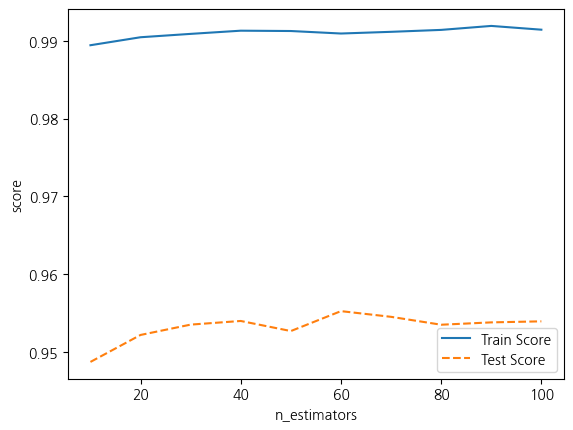

In [121]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

-  n_estimators = 100

In [122]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 100,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.991,0.954
1,2,0.988,0.954
2,3,0.983,0.954
3,4,0.979,0.956
4,5,0.976,0.955
5,6,0.973,0.956
6,7,0.972,0.956
7,8,0.970,0.956
8,9,0.969,0.956
9,10,0.967,0.956


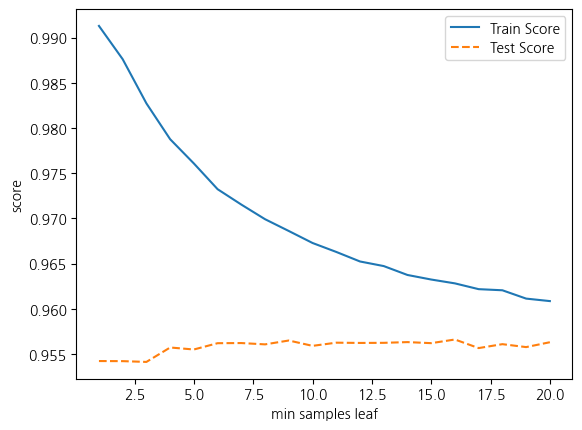

In [123]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

-  min_samples_leaf: 4

In [124]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 4,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.979,0.956
1,6,0.979,0.956
2,8,0.979,0.956
3,10,0.977,0.956
4,12,0.976,0.956
5,14,0.975,0.956
6,16,0.974,0.957
7,18,0.973,0.956
8,20,0.972,0.956
9,22,0.971,0.956


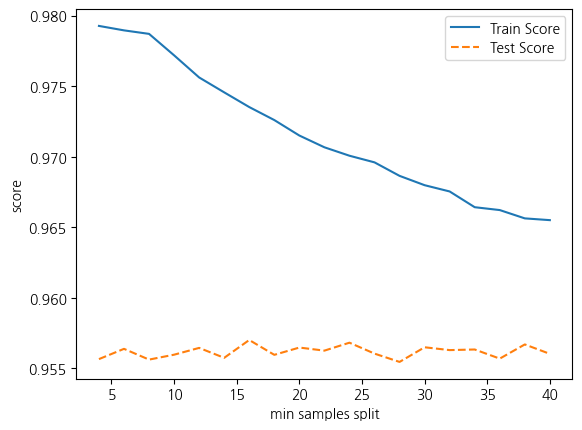

In [125]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

-  min_samples_split: 12

In [126]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 100,
                               min_samples_leaf = 4, min_samples_split = 12,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.727,0.747
1,2,0.910,0.918
2,3,0.953,0.949
3,4,0.960,0.955
4,5,0.966,0.956
5,6,0.969,0.956
6,7,0.973,0.957
7,8,0.974,0.956
8,9,0.975,0.956
9,10,0.975,0.956


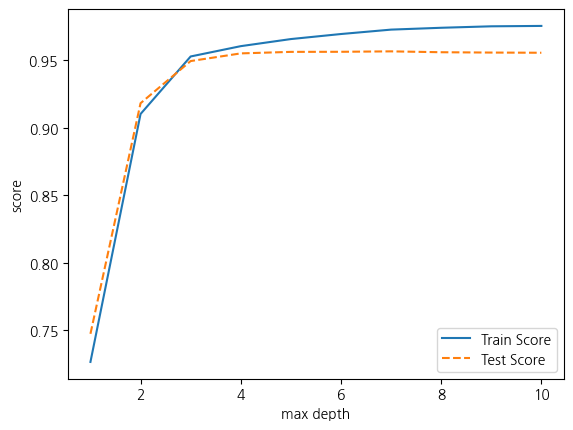

In [127]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

-  max_depth: 5

In [128]:
# 144 Page
rf_final = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 4,
                                 min_samples_split = 12, max_depth = 5)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.966
Score on test set: 0.957


In [129]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1018    18217710.0
878     16244780.0
433     13039070.0
850     18162560.0
1030     1438470.0
356      9169220.0
542     12164890.0
218       672770.0
966     19153160.0
1079     1163490.0
Name: target, dtype: float64
test data의 예측값 : 
 [15850564.3798587  17552151.05813621 15122828.67543084 16912189.42765683
  1205666.15957028 10081126.9562708  12299781.59681319   893603.52910872
 14288736.06399662  1078129.2536425 ]


In [130]:
# 파라미터 값 확인
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

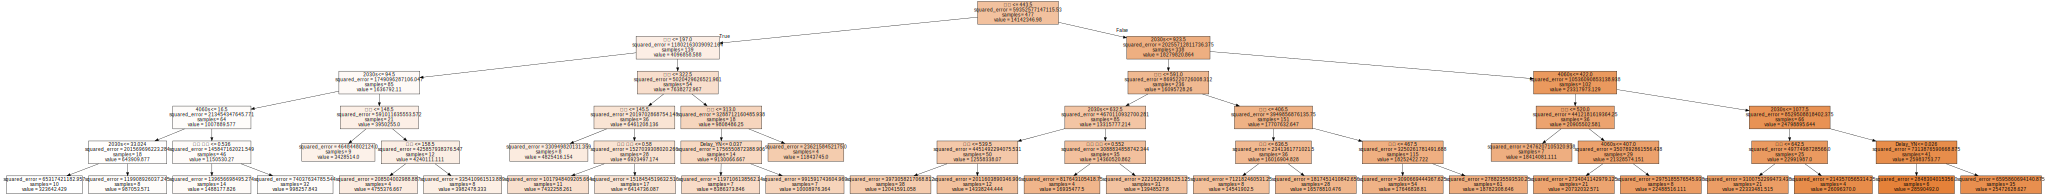

In [131]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_name ,
                impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

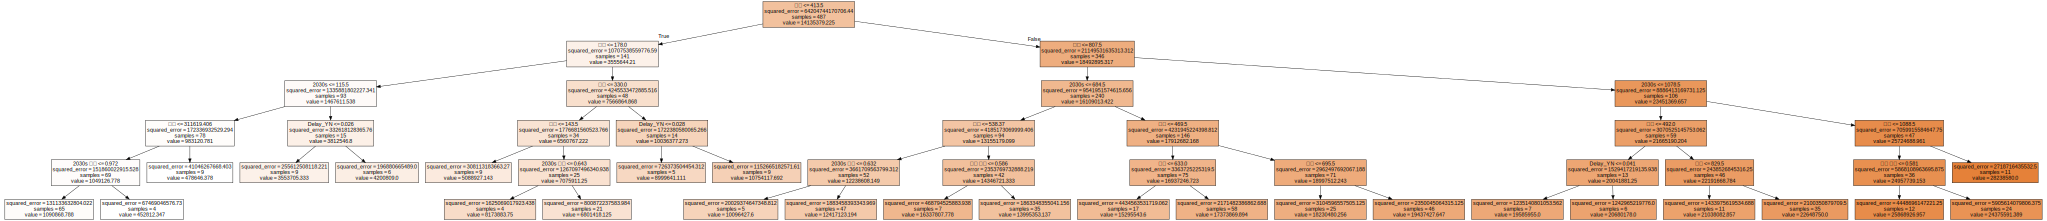

In [132]:
# 1번 트리
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot", feature_names = v_feature_name ,
                impurity = True, filled = True)
# tree_final_1.dot 그리기
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [133]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,2030s,0.696
1,여성,0.261
3,4060s,0.033
0,남성,0.006
6,2030s 비율,0.002
5,여성 비율,0.001
4,Delay_YN,0.001


Text(0, 0.5, '변수')

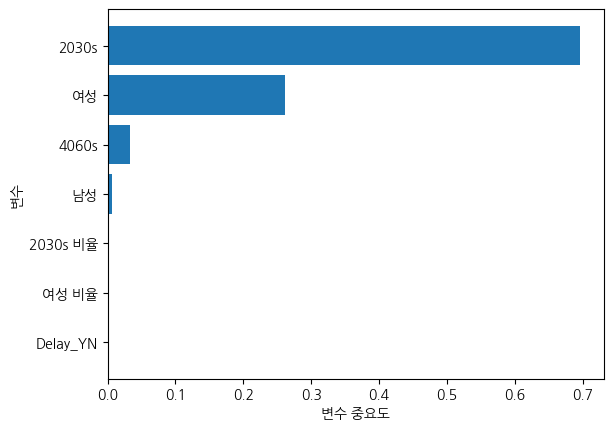

In [134]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
# 결과 안났음
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestRegressor(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))